# Extended Kalman Smoother

In [1]:
# %load imports.py
%load_ext autoreload
%autoreload 2
%reload_kedro
%config Completer.use_jedi = False  ## (To fix autocomplete)

import pandas as pd
from src.models.vmm import ModelSimulator
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams["figure.figsize"] = (5,5)
plt.style.use('presentation')
from src.visualization.plot import track_plots, plot, captive_plot
import kedro
import numpy as np
import os.path
import anyconfig


from myst_nb import glue
from src.symbols import *
import src.symbols as symbols
from src.system_equations import *

from IPython.display import display, Math, Latex, Markdown
from sympy.physics.vector.printing import vpprint, vlatex

from src.models.regression import MotionRegression

from src.parameters import df_parameters
p = df_parameters["symbol"]

# Read configs:
conf_path = os.path.join("../../conf/base/")
runs_globals_path = os.path.join(
    conf_path,
    "runs_globals.yml",
)

runs_globals = anyconfig.load(runs_globals_path)
model_test_ids = runs_globals["model_test_ids"]

join_globals_path = os.path.join(
    conf_path,
    "join_globals.yml",
)

joins = runs_globals["joins"]
join_runs_dict = anyconfig.load(join_globals_path)

globals_path = os.path.join(
    conf_path,
    "globals.yml",
)
global_variables = anyconfig.load(globals_path)



vmm_names = global_variables["vmms"]
only_joined = global_variables[
    "only_joined"
]  # (regress/predict with only models from joined runs)S

vmms = {}
for vmm_name in vmm_names:
    vmms[vmm_name] = catalog.load(vmm_name)


UsageError: Line magic function `%reload_kedro` not found.


In [2]:
id = 22774
data = catalog.load(f"{ id }.data")
data_ek_smooth = catalog.load(f"{ id }.data_ek_smooth")
data_ek_filter = catalog.load(f"{ id }.data_ek_filter")
data['r1d'] = np.gradient(data['r'], data.index)

2022-03-28 14:43:55,585 - kedro.io.data_catalog - INFO - Loading data from `22774.data` (CSVDataSet)...
2022-03-28 14:43:55,819 - kedro.io.data_catalog - INFO - Loading data from `22774.data_ek_smooth` (CSVDataSet)...
2022-03-28 14:43:55,869 - kedro.io.data_catalog - INFO - Loading data from `22774.data_ek_filter` (CSVDataSet)...


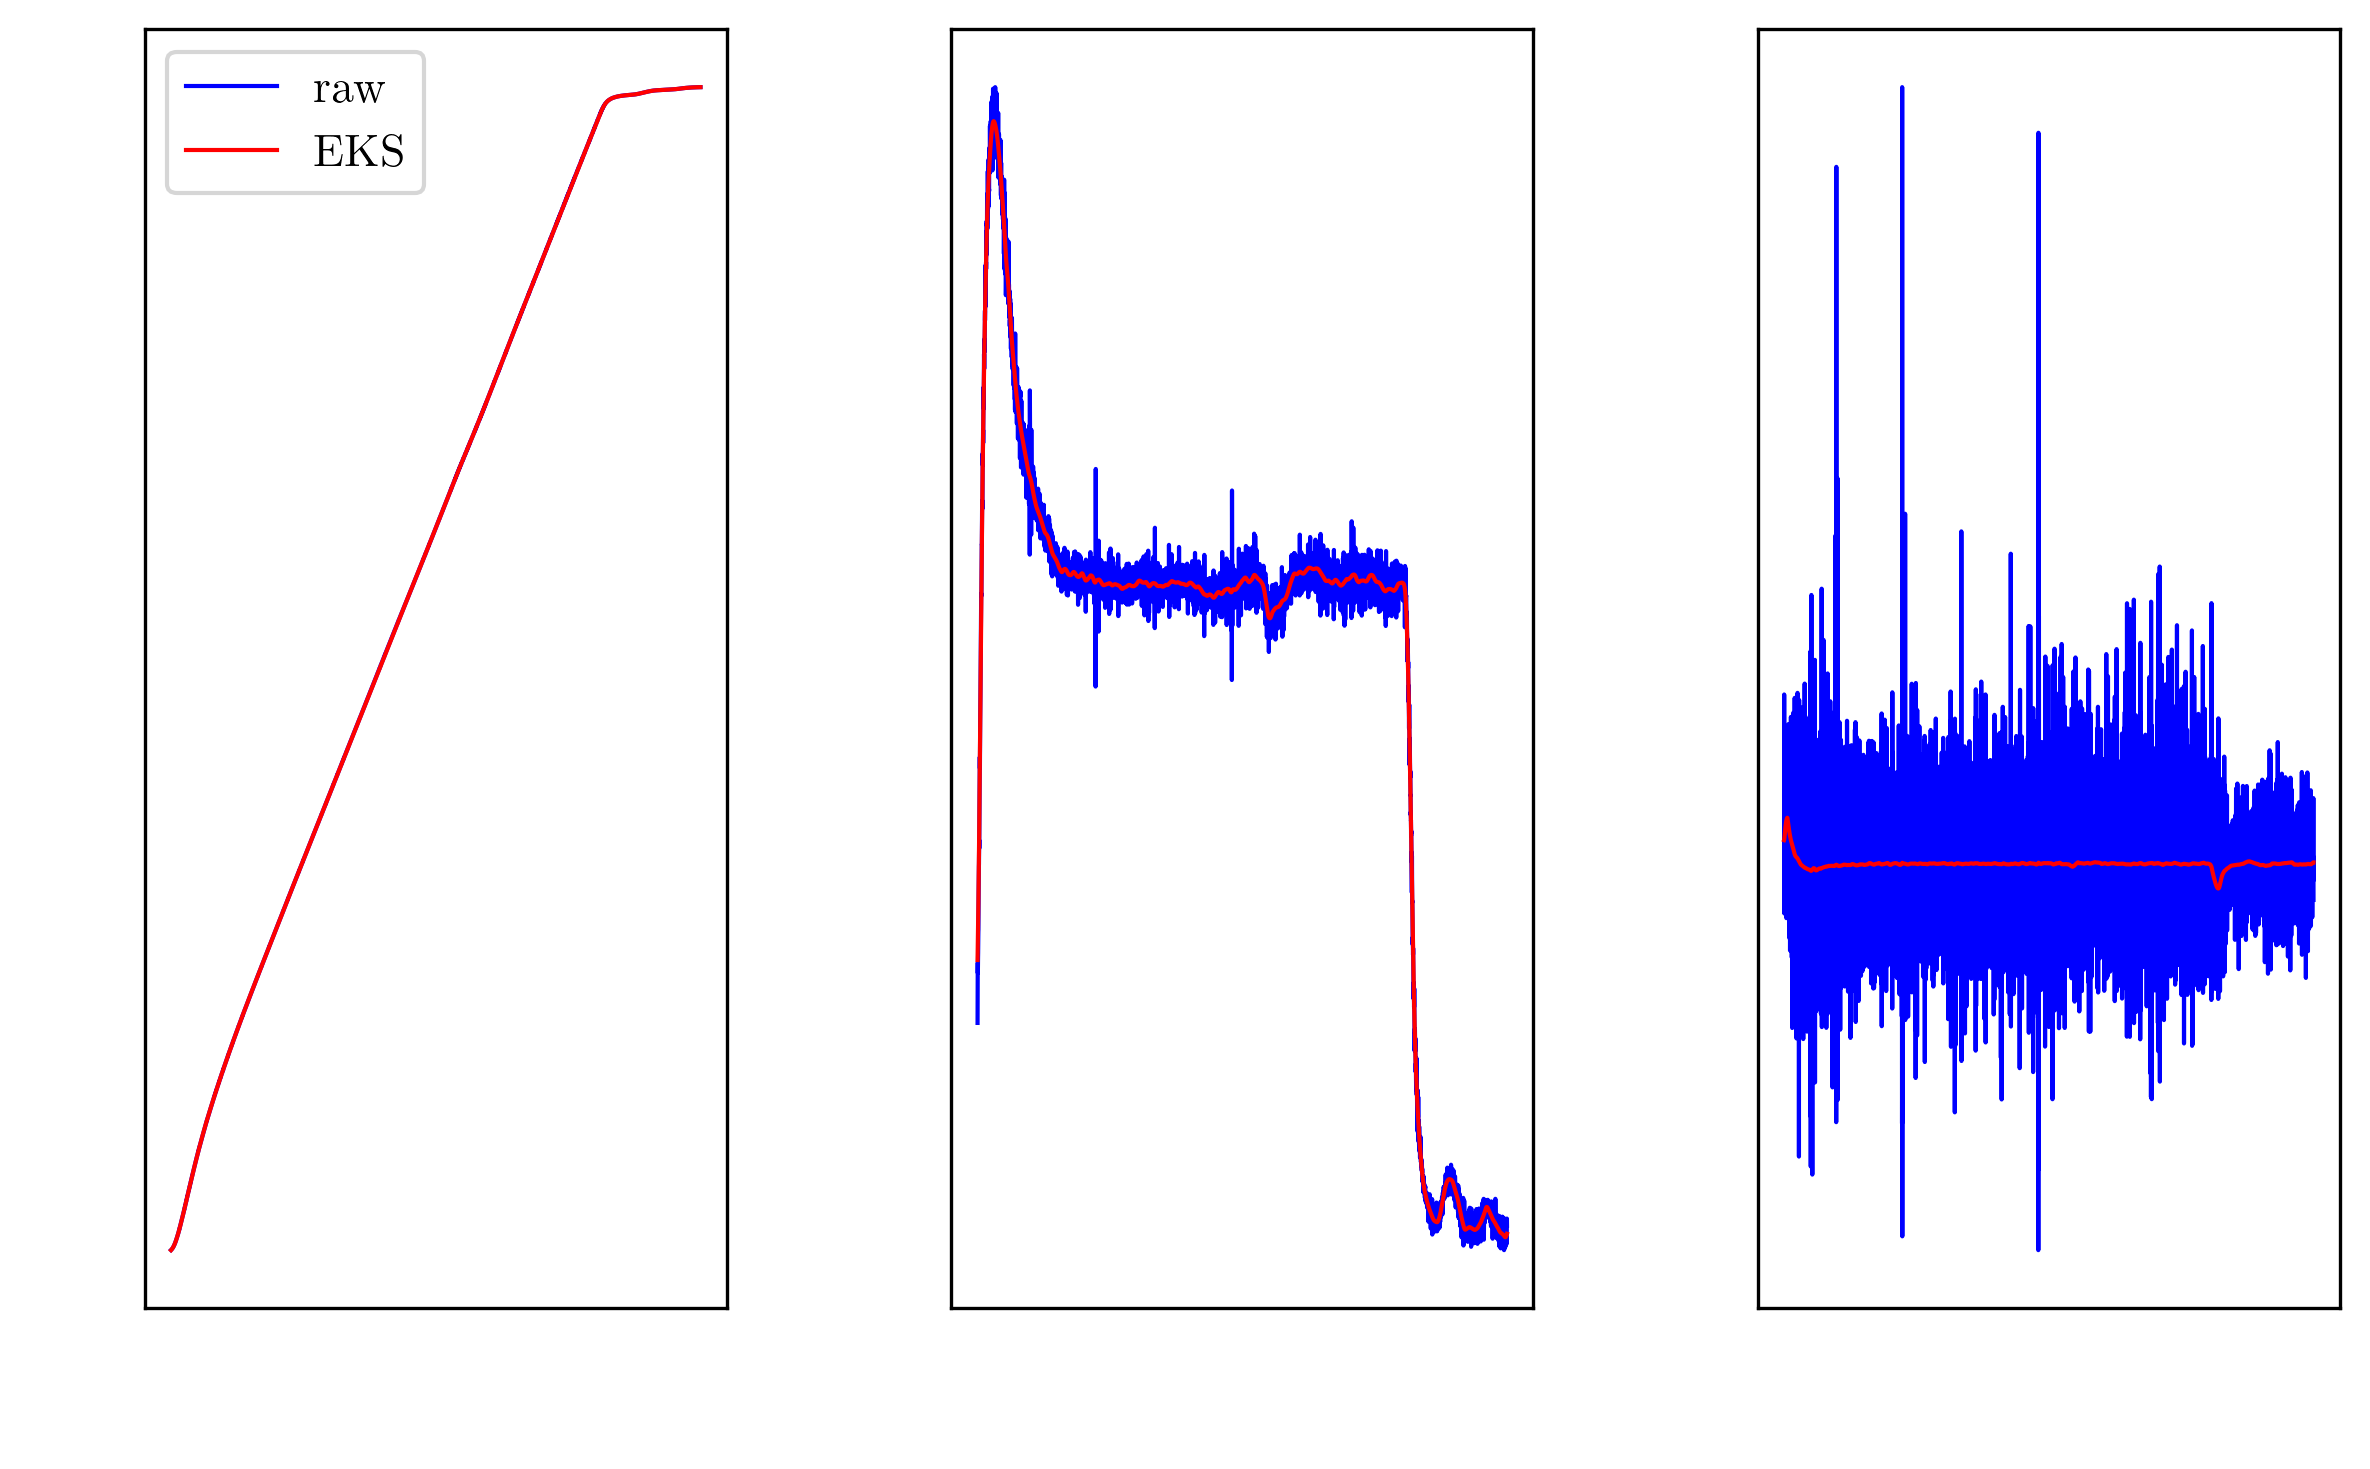

In [3]:
dataframes = {
    'raw' : data,
    #'EKF' : data_ek_filter,
    'EKS' : data_ek_smooth,
    
}
fig = plot(dataframes, keys=['psi','r','r1d'], ncols=3, fig_size=matplotlib.rcParams["figure.figsize"]);
fig.axes[0].set_ylabel(r'$\psi$')
fig.axes[2].set_ylabel(r'$\dot{r}$')
fig.axes[2].set_xlabel('time');
